# Group Project: Twitter Classification (Fall 2022)
**Dr. Dave Wanik - OPIM 5509: Introduction to Deep Learning - University of Connecticut**

* Group Number: 12
* Group Members: Ayush Sinha, Nandita Krishnan, Peeyush Kalidindi

-----------------------------------------------
Can deep learning 'steal' the logic of rules-based sentiment analysis packages? In this project, you will see if a deep learning model can replicate the scores of a well-known sentiment analysis scoring model called 'Sentiment Intensity Analyzer' from the nltk package.

For this project, you are provided with a function to scrape tweets of certain users on Twitter. Use the function to scrape 1000 tweets (or more! 2000 is better) for any person(s) or organization(s) you are interested in. You then feed these Tweets into the `nltk SentimentIntensityAnalyzer()` and generate [four sentiment scores: positive, negative, neutral and composite](https://stackoverflow.com/questions/40325980/how-is-the-vader-compound-polarity-score-calculated-in-python-nltk). You will use these scores as your target variables (a neural network with 4 outputs) and try to predict them by just using the words in the Tweets!

Of course, as I mention above, you are only required to use one Twitter account for the project, but if you want to go above and beyond and scrape MANY tweets from many different people, you are welcome to do so - the more the merrier!

The rubric is shown below. Good luck!



## Rubric

Your script should be able to run completely in this notebook - no need to mount your Google Drive since this is all public data! Points off if it all doesn't run in this notebook. Notebook should be fully executed before submitting or points off.


**Part I: Data Preparation ( 25 points)**
* (5 points) Write a few lines about the two people/organizations you are going to scrape. Why are they of interest to you? Why should they be of interest to me?
* (5 points) Use the function to scrape 1000 tweets from each a single person/organization. Then merge your 1k individual text files into a single .csv file [like this](https://medium.com/@stella96joshua/how-to-combine-multiple-csv-files-using-python-for-your-analysis-a88017c6ff9e). Your .csv file should have 1000 rows and 3 or 4 columns at this point.
* (5 points) Create a word cloud from the text data - what do you see? You may need to tokenize the data before performing this step.
* (10 points) Run the `nltk Sentiment Intensity Analyzer`. You will run the `nltk SentimentIntensityAnalyzer()` to derive 4 scores for each Tweet: compound, pos, neutral and neg. Follow [this example](https://www.nltk.org/howto/sentiment.html) and review [this example](https://www.nltk.org/_modules/nltk/sentiment/vader.html) to understand how `nltk` is calculating these scores. Add these scores as 4 columns to your .csv file - which should have 1k rows and 7 or 8 columns.
* (5 points) Examine the distribution of the scores for each score (make a 5 number summary and create a histogram for each score) - you are going to try to predict these scores using your recurrent neural network (with four outputs!) 


**Part II: Modeling (45 points)**
* (30 points) Fit three models with different architectures of varying complexity. Please have nice organized headers so I can grade it easily. 

* Model 1: CountVectorizer() and TF-IDF with Dense Neural Networks
* Model 2: Flattened word embeddings into a Dense Neural Network (pre-trained)
* Model 3: DL model with at least one recurrent layer and other things we learned from class.

  * LSTM, GRU or SimpleRNN
  * Bidirectional LSTM or GRU
  * 1D Conv and Pooling
  * Stacked layers etc.
  * You are welcome to try pre-trained word embeddings but are not required to.

* (15 points) For each model you build, make sure you provide learning curves (early stopping is a good idea) and a scatterplot of actual vs. predicted values for train and test partition along with useful error metrics (R2, MAE, RMSE etc.) Make some comments on which model is doing the best. Make sure you are 'tinkering' with your model to get the best results possible and ensure that you are not overfitting.

**Tip:** You may get bad results - this is OK! If you do, try to experiment with the hyperparameters such as the max length and common words you will keep - this can make a big difference! Do not worry too much about accuracy from the first model, just try to improve it in subsequent models. You may need to grab more Tweets or choose a different Twitter account if your model has no skill.




**Part III: Analysis (20 points)**
* Write five to ten bullets to compare your results and discuss how you improve the models by changing the architectures. Was your Deep Learning model able to 'steal' the logic of the `nltk SentimentIntensityAnalyzer()`? Make some comments about how deep learning is superior to rules-based systems like the `nltk SentimentIntensityAnalyzer()`.


... and have fun!

# **TWEET SCRAPING**

In [ ]:
# you will write to a Google Drive, not your local drive!

In [ ]:
import os
import glob

files = glob.glob('/content/Tweets/*')
for f in files:
    os.remove(f)

In [ ]:
# make a folder to store data
base_dir = '/content/'

import tensorflow as tf

#Create a new directory (a folder) in your Drive
tf.io.gfile.mkdir(base_dir)

#Combine the 2 strings
Tweets_dir = base_dir + '/Tweets/'

#Create the second directory
tf.io.gfile.mkdir(Tweets_dir)

In [ ]:
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 1.3 MB/s 


In [ ]:
maxTweets = 1200

# make sure you update the username and number of tweets!
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@kevinolearytv + since:2008-01-01 until:2022-01-08-filter:links -filter:replies').get_items()):
  csvFile = open(Tweets_dir + str(i) + '.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])

  if i > maxTweets :
    break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
print('Total Tweets:',i)
csvFile.close()

Total Tweets: 1201


In [ ]:
maxTweets = 1200

# make sure you update the username and number of tweets!
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('from:@themetav3rse + since:2008-01-01 until:2022-11-30-filter:links -filter:replies').get_items()):
  csvFile = open(Tweets_dir + str(i) + 'meta.csv', 'a', newline='', encoding='utf8')
  csvWriter = csv.writer(csvFile)
  csvWriter.writerow(['id','date','tweet',])

  if i > maxTweets :
    break
  csvWriter.writerow([tweet.id, tweet.date, tweet.content])
print('Total Tweets:',i)
csvFile.close()

Total Tweets: 1201


In [ ]:
import os

_, _, files = next(os.walk("/content/Tweets"))
file_count = len(files)
file_count

2404

In [ ]:
import os
import pandas as pd
#rea  d the path
file_path = "/content/Tweets"
#list all the files from the directory
file_list = os.listdir(file_path)
file_list

['68.csv',
 '1080meta.csv',
 '693meta.csv',
 '58meta.csv',
 '0.csv',
 '652.csv',
 '415.csv',
 '1009meta.csv',
 '1193meta.csv',
 '147.csv',
 '531.csv',
 '980meta.csv',
 '55meta.csv',
 '722meta.csv',
 '817meta.csv',
 '1081meta.csv',
 '127.csv',
 '706meta.csv',
 '1186.csv',
 '1189meta.csv',
 '520meta.csv',
 '506.csv',
 '706.csv',
 '382meta.csv',
 '701.csv',
 '123.csv',
 '372.csv',
 '913meta.csv',
 '530meta.csv',
 '301.csv',
 '821meta.csv',
 '1194meta.csv',
 '862.csv',
 '572.csv',
 '996meta.csv',
 '840meta.csv',
 '1155meta.csv',
 '842meta.csv',
 '634.csv',
 '875meta.csv',
 '598.csv',
 '480.csv',
 '882meta.csv',
 '819.csv',
 '509meta.csv',
 '1142.csv',
 '697meta.csv',
 '1199meta.csv',
 '845.csv',
 '509.csv',
 '606.csv',
 '93.csv',
 '750meta.csv',
 '269.csv',
 '1018meta.csv',
 '707meta.csv',
 '605meta.csv',
 '764.csv',
 '755.csv',
 '371meta.csv',
 '242.csv',
 '1124.csv',
 '678.csv',
 '332meta.csv',
 '829meta.csv',
 '477.csv',
 '962meta.csv',
 '809.csv',
 '640.csv',
 '274.csv',
 '1112meta.csv

In [ ]:
df_Tweets = pd.DataFrame()
#append all files together
for file in file_list:
            df_temp = pd.read_csv('/content/Tweets/'+file)
            df_Tweets = df_Tweets.append(df_temp, ignore_index=True)
df_Tweets

,id,date,tweet
0,1459947702289108997,2021-11-14 18:13:51+00:00,I’m going LIVE TODAY at 2:45pm &amp; 5:45pm on...
1,1486106923858632705,2022-01-25 22:41:15+00:00,Push the 🅿️
2,1518022897348096005,2022-04-24 00:23:56+00:00,It’s @BoredApeYC’s first birthday! The collect...
3,1593321535242108931,2022-11-17 19:13:51+00:00,The new declaration released by the new CEO of...
4,1479590498314690561,2022-01-07 23:07:18+00:00,Almost time! Who’s watching with me? #SharkTan...
...,...,...,...
2397,1574837209416568861,2022-09-27 19:03:44+00:00,TR3NDING: Celsius CEO Alex Mashinsky resigns
2398,1233565277511716868,2020-02-29 01:30:55+00:00,There’s only one Mr. Wonderful! https://t.co/1...
2399,1589455559195250692,2022-11-07 03:11:50+00:00,"Came cross $1.9B, what floors we sweeping? htt..."
2400,1570119061262028801,2022-09-14 18:35:30+00:00,11 hours until the Merge.


In [ ]:
df_Tweets.dropna(inplace = True)

In [ ]:
df_Tweets.shape

(2402, 3)

In [ ]:
# Deleting repeated headers 
df_Tweets = df_Tweets.drop(df_Tweets[df_Tweets.id == 'id'].index)

# **WORD CLOUD**

### 1. ISOLATING THE TEXT and CLEAN

In [ ]:
# Imports
import seaborn as sns
import pandas as pd
import string
import nltk

In [ ]:
# Isolate the textual variable
df_Tweets_wc = df_Tweets[['tweet']].copy()

# Transform all the words to lowercase
df_Tweets_wc['tweet'] = df_Tweets_wc.tweet.str.lower()

# Remove punctuation
df_Tweets_wc['tweet'] = df_Tweets_wc.tweet.apply(lambda x: x.translate( str.maketrans('', '', string.punctuation) ) )

### 2. TOKENIZATION and PREPARATION

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = set(stopwords.words('english'))
# Gather all the text
txt = ' '.join(df_Tweets_wc['tweet'])
# Tokenize abstracts
tokens = word_tokenize(txt)
# Removing stopwords
text_clean = [word for word in tokens if word not in stopwords]

### 3. GENERATING THE WORD CLOUD

In [ ]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

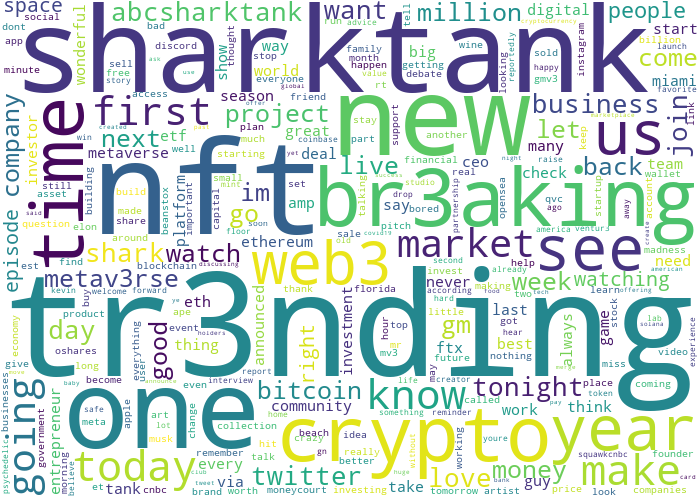

In [ ]:
# Generate the text
text = ' '.join(text_clean)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=300, contour_width=3,contour_color='steelblue', width=700, height=500, scale=1, max_font_size=500, collocations=False)

# Generate a word cloud
wordcloud.generate(text)

# Visualize the word cloud
wordcloud.to_image()

### **OBSERVATIONS FROM THE WORD CLOUD:**

1.  World cloud very **astutely highlights the keywords used often** for both our selected twitter accounts

2.  Based on the distribution, we see the words '**TR3NDING**', '**BR3AKING**', '**NFT**', '**WEB3**', '**metav3rse**' being pulled from '**@themetav3rse**' which reflect the writing style of the handle and the content that is more frequent

3. Similarly, we obserbe the keywords '**sharktank**', '**crypto**', '**market**', '**shark**' being pulled from '**@mrwonderful**' handle i.e., **Kevin O'leary** - as a television personality on the show SharkTank, and prominent businessman and entrepreneur.

# **SENTIMENT INTENSITY ANALYZER**

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


> We use **sentiment intensity analyzer** to assign score for the tweets across compound, positive, negative or neutral fields

> We **create 4 new columns** using these 4 fields and add it to the main dataset

In [ ]:
#assigning the tweets to a variable

sentences = list(df_Tweets['tweet'])
pos = []
neg = []
neu = []
compound = []

#running the Analyser on every tweet, and saving it's corresponding scores on the pos/neg/neu/compound columns
for sentence in sentences:
     sid = SentimentIntensityAnalyzer()
     print(sentence)
     ss = sid.polarity_scores(sentence)
     for k in sorted(ss):
       print('{0}: {1}, '.format(k, ss[k]), end='')
       if k == 'pos':
         pos.append(ss[k])
       elif k == 'neg':
         neg.append(ss[k])
       elif k == 'neu':
         neu.append(ss[k])
       elif k == 'compound':
         compound.append(ss[k])
     print()

Streaming output truncated to the last 5000 lines.
👀
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
GM
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
We’re letting 100 new friends into our Discord community — see you in NFT chat 🤝 

Link in bio (until it’s gone)
compound: 0.1027, neg: 0.113, neu: 0.756, pos: 0.13, 
In a royalty deal, I’m only making money if YOU’RE making money. It’s a win win for everyone. #sharktank
compound: 0.8225, neg: 0.0, neu: 0.664, pos: 0.336, 
There’s a rumor spreading that Disney has made a major acquisition of an NFT company…

🤔
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
I’m ready to rock! I have a few ideas for this market https://t.co/sWpogkXsxK
compound: 0.4199, neg: 0.0, neu: 0.782, pos: 0.218, 
BR3AKING: Nike is hiring a Director of Metav3rse Engineering, signaling their continued push into Web3 https://t.co/GCdzwKycRE
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
TR3NDING: Iran has authorized the use of cryptocurrencies as a method of payment for com

### CHECKING OUR WORK - 4 new columns were added to the main dataframe

In [ ]:
df_Tweets['pos'] = pos
df_Tweets['neg'] = neg
df_Tweets['neu'] = neu
df_Tweets['compound'] = compound
df_Tweets.head(20)

,id,date,tweet,pos,neg,neu,compound
0,1459947702289108997,2021-11-14 18:13:51+00:00,I’m going LIVE TODAY at 2:45pm &amp; 5:45pm on...,0.217,0.000,0.783,0.7568
1,1486106923858632705,2022-01-25 22:41:15+00:00,Push the 🅿️,0.000,0.000,1.000,0.0000
2,1518022897348096005,2022-04-24 00:23:56+00:00,It’s @BoredApeYC’s first birthday! The collect...,0.062,0.000,0.938,0.4003
3,1593321535242108931,2022-11-17 19:13:51+00:00,The new declaration released by the new CEO of...,0.000,0.070,0.930,-0.5106
4,1479590498314690561,2022-01-07 23:07:18+00:00,Almost time! Who’s watching with me? #SharkTan...,0.000,0.000,1.000,0.0000
5,1319796938196254722,2020-10-24 00:24:45+00:00,On entrepreneurship. 💯 https://t.co/rclLSdfhBu,0.000,0.000,1.000,0.0000
6,1365477259923054597,2021-02-27 01:42:02+00:00,Our office dog would have been the perfect mas...,0.248,0.000,0.752,0.6467
7,1491460568271638529,2022-02-09 17:14:44+00:00,Don’t forget to join us tonight at 7 pm EST/4 ...,0.107,0.081,0.812,0.1511
8,1478529531275354116,2022-01-05 00:51:24+00:00,Wake up babe. You keep talking in your sleep a...,0.000,0.000,1.000,0.0000
9,1438327112784564224,2021-09-16 02:21:21+00:00,I try to keep emotion out of business. Sometim...,0.000,0.053,0.947,-0.0900


### CREATING DISTRIBUTION FOR EACH SCORING COLUMN

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Tweet Count')

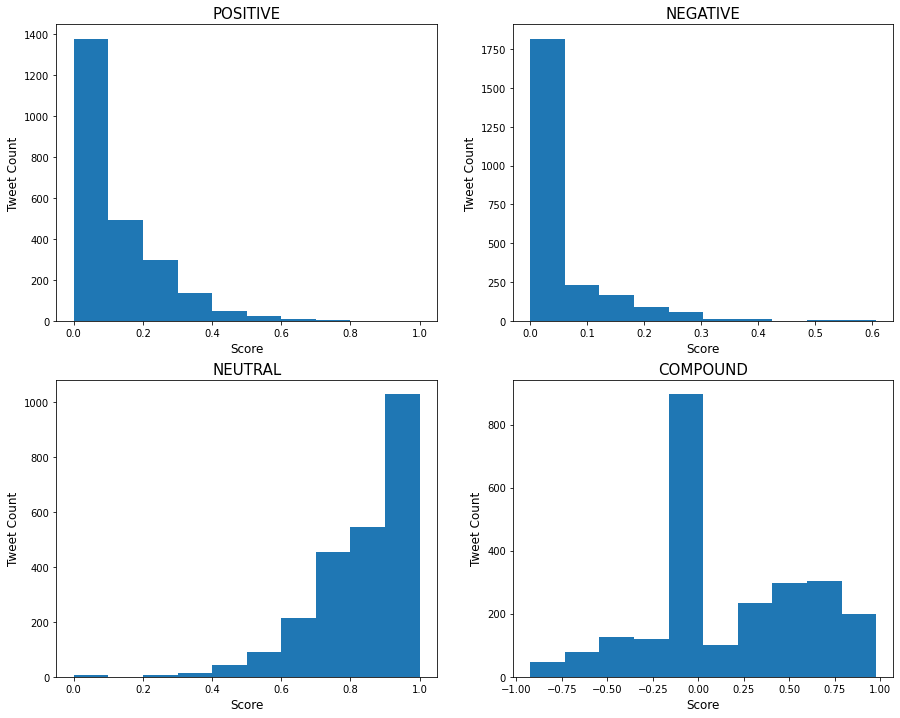

In [ ]:
fig, axs = plt.subplots(2, 2)
fig.set_figheight(12)
fig.set_figwidth(15)
axs[0, 0].hist(df_Tweets['pos'])
axs[0, 0].set_title('POSITIVE', size = 15)
axs[0, 0].set_xlabel('Score', size = 12)
axs[0, 0].set_ylabel('Tweet Count', size = 12)
axs[0, 1].hist(df_Tweets['neg'])
axs[0, 1].set_title('NEGATIVE', size = 15)
axs[0, 1].set_xlabel('Score', size = 12)
axs[0, 1].set_ylabel('Tweet Count', size = 12)
axs[1, 0].hist(df_Tweets['neu'])
axs[1, 0].set_title('NEUTRAL', size = 15)
axs[1, 0].set_xlabel('Score', size = 12)
axs[1, 0].set_ylabel('Tweet Count', size = 12)
axs[1, 1].hist(df_Tweets['compound'])
axs[1, 1].set_title('COMPOUND', size = 15)
axs[1, 1].set_xlabel('Score', size = 12)
axs[1, 1].set_ylabel('Tweet Count', size = 12)

# **MODELING**

In [ ]:
# Splitting into X and y
X = df_Tweets['tweet']
# y = df_Tweets['pos']
y = df_Tweets[['pos', 'neg', 'neu', 'compound']]
print(X.shape, y.shape)

(2402,) (2402, 4)


# Model 1: CountVectorizer() and TF-IDF with Dense Neural Networks



In [ ]:
# tokenize
from keras.preprocessing.text import Tokenizer
t = Tokenizer(num_words=800)
t.fit_on_texts(X)

# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

OrderedDict([('i’m', 91), ('going', 86), ('live', 58), ('today', 91), ('at', 264), ('2', 67), ('45pm', 2), ('amp', 66), ('5', 30), ('on', 543), ('qvc', 23), ('with', 427), ('davidvenableqvc', 5), ('maryqvc', 4), ('my', 257), ('biggest', 13), ('o’leary', 9), ('fine', 4), ('wines', 3), ('sales', 21), ('get', 97), ('ready', 16), ('for', 507), ('the', 1917), ('holidays', 2), ('gets', 14), ('your', 216), ('here', 93), ('https', 1669), ('t', 1702), ('co', 1703), ('ufzybmifwq', 1), ('dkb0mzpelz', 1), ('push', 7), ('🅿️', 2), ('it’s', 117), ('boredapeyc’s', 1), ('first', 87), ('birthday', 6), ('collection', 32), ('minted', 6), ('0', 26), ('08', 2), ('eth', 66), ('one', 165), ('year', 71), ('ago', 19), ('since', 22), ('then', 15), ('value', 17), ('including', 14), ('airdrops', 3), ('has', 298), ('risen', 3), ('to', 1419), ('bayc', 8), ('130', 2), ('mayc', 2), ('35', 4), ('bakc', 2), ('11', 33), ('apecoin', 4), ('84', 1), ('260', 1), ('in', 814), ('year…', 1), ('😳', 13), ('new', 149), ('declarati

### Count Vectorizer

In [ ]:
# integer encode documents
encoded_docs_count = t.texts_to_matrix(X, mode='count')
print(encoded_docs_count)

[[0. 1. 2. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


#### Building the model

In [ ]:
# split into train and test - COUNT
from sklearn.model_selection import train_test_split
X_train_1_count, X_test_1_count, y_train_1_count, y_test_1_count = train_test_split(encoded_docs_count, y,
                                                    random_state=42,
                                                    train_size=0.6)
print('Count Vectorizer')
print("Orignal data shape : ",encoded_docs_count.shape) # Count
print("X_train shape : ", X_train_1_count.shape,  "y_train shape : ", y_train_1_count.shape)
print("X_test shape : ", X_test_1_count.shape, "y_test shape : ", y_test_1_count.shape, '\n')

Count Vectorizer
Orignal data shape :  (2402, 800)
X_train shape :  (1441, 800) y_train shape :  (1441, 4)
X_test shape :  (961, 800) y_test shape :  (961, 4) 



In [ ]:
##creating the model architecture

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train_1_count.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(y_test_1_count.shape[1], activation='linear')) # output node
model.summary()

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               80100     
                                                                 
 dropout_14 (Dropout)        (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dropout_15 (Dropout)        (None, 100)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 404       
                                                                 
Total params: 90,604
Trainable params: 90,604
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# early stopping callback
es = EarlyStopping(monitor='val_mae',
                   mode='min',
                   patience=30, # you can choose a big value!
                   restore_best_weights = True) # don't forget this! otherwise it's potentially suboptimal weights

history = model.fit(X_train_1_count, y_train_1_count, 
                    callbacks=[es],
                    epochs=500, 
                    batch_size=100,
                    validation_data=(X_test_1_count, y_test_1_count))

Epoch 1/500
15/15 [==============================] - 1s 17ms/step - loss: 0.1130 - mae: 0.2409 - val_loss: 0.0711 - val_mae: 0.1893
Epoch 2/500
15/15 [==============================] - 0s 9ms/step - loss: 0.0652 - mae: 0.1832 - val_loss: 0.0602 - val_mae: 0.1700
Epoch 3/500
15/15 [==============================] - 0s 12ms/step - loss: 0.0522 - mae: 0.1624 - val_loss: 0.0543 - val_mae: 0.1599
Epoch 4/500
15/15 [==============================] - 0s 8ms/step - loss: 0.0419 - mae: 0.1456 - val_loss: 0.0525 - val_mae: 0.1577
Epoch 5/500
15/15 [==============================] - 0s 11ms/step - loss: 0.0352 - mae: 0.1328 - val_loss: 0.0480 - val_mae: 0.1491
Epoch 6/500
15/15 [==============================] - 0s 21ms/step - loss: 0.0295 - mae: 0.1226 - val_loss: 0.0472 - val_mae: 0.1448
Epoch 7/500
15/15 [==============================] - 0s 27ms/step - loss: 0.0251 - mae: 0.1136 - val_loss: 0.0464 - val_mae: 0.1422
Epoch 8/500
15/15 [==============================] - 0s 15ms/step - loss: 0.02

#### Model Evaluation

##### Learning Curve (loss vs. epochs)

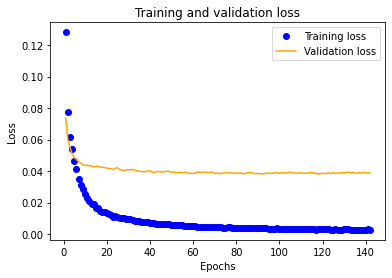

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

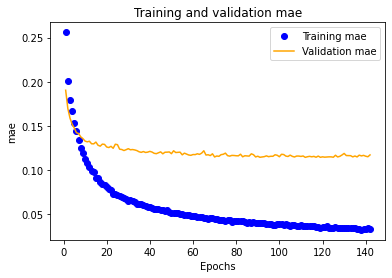

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['mae'] # you can change this
val_loss_values = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

##### Scatterplots of actual vs. predicted

In [ ]:
train_preds_count = model.predict(X_train_1_count)
train_preds_count = pd.DataFrame(train_preds_count, columns = ['pos', 'neg', 'neu', 'compound'])
print(train_preds_count.head())

test_preds_count = model.predict(X_test_1_count)
test_preds_count = pd.DataFrame(test_preds_count, columns = ['pos', 'neg', 'neu', 'compound'])
print(test_preds_count.head())

46/46 [==============================] - 0s 2ms/step
        pos       neg       neu  compound
0  0.248382  0.002320  0.752212  0.647125
1 -0.008896 -0.005108  1.014642 -0.013833
2  0.041908  0.093807  0.875504 -0.368714
3  0.249098  0.009094  0.766395  0.918598
4  0.006958  0.139515  0.878407 -0.513286
31/31 [==============================] - 0s 2ms/step
        pos       neg       neu  compound
0  0.153194 -0.023199  0.881804  0.352377
1  0.000349 -0.007286  1.019251  0.011863
2  0.018568  0.065290  0.805509 -0.218217
3  0.061015  0.003672  0.909450  0.220904
4  0.066327 -0.002637  0.956768  0.175053


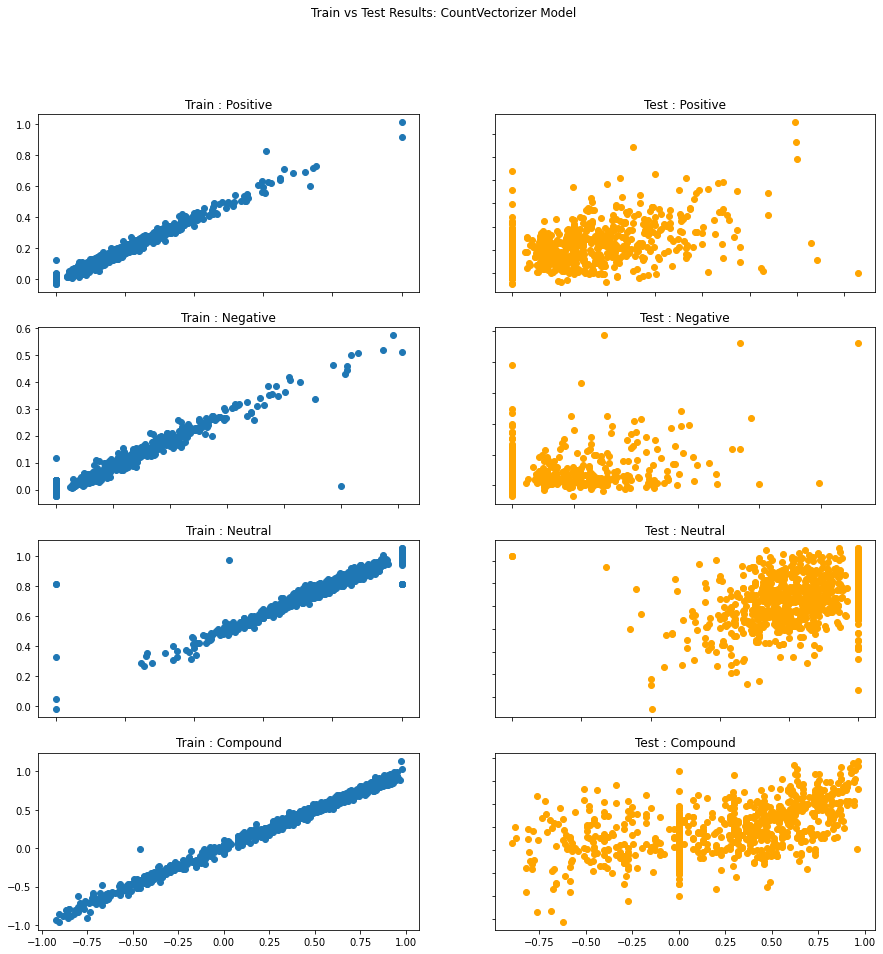

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Train vs Test Results: CountVectorizer Model')
axs[0,0].scatter(y_train_1_count['pos'], train_preds_count['pos'])
axs[0,1].scatter(y_test_1_count['pos'], test_preds_count['pos'], c='orange')
axs[1,0].scatter(y_train_1_count['neg'], train_preds_count['neg'])
axs[1,1].scatter(y_test_1_count['neg'], test_preds_count['neg'], c='orange')
axs[2,0].scatter(y_train_1_count['neu'], train_preds_count['neu'])
axs[2,1].scatter(y_test_1_count['neu'], test_preds_count['neu'], c='orange')
axs[3,0].scatter(y_train_1_count['compound'], train_preds_count['compound'])
axs[3,1].scatter(y_test_1_count['compound'], test_preds_count['compound'], c='orange')

# ax2.plot(x, y**2, 'tab:orange')
# ax3.plot(x, -y, 'tab:green')
# ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

axs[0,0].title.set_text('Train : Positive')
axs[0,1].title.set_text('Test : Positive')
axs[1,0].title.set_text('Train : Negative')
axs[1,1].title.set_text('Test : Negative')
axs[2,0].title.set_text('Train : Neutral')
axs[2,1].title.set_text('Test : Neutral')
axs[3,0].title.set_text('Train : Compound')
axs[3,1].title.set_text('Test : Compound')

##### Model Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Error Metrics \n")
print('Mean Absolute Error:')
print('Train:', mean_absolute_error(y_train_1_count, train_preds_count)) # train
print('Test:', mean_absolute_error(y_test_1_count, test_preds_count), '\n') # test

print('Root Mean Squared Error:')
print('Train:', mean_squared_error(y_train_1_count, train_preds_count, squared=False)) # train
print('Test:', mean_squared_error(y_test_1_count, test_preds_count, squared=False), '\n') # test

print('R2 Score:')
print('Train:', r2_score(y_train_1_count, train_preds_count)) # train
print('Test:', r2_score(y_test_1_count, test_preds_count), '\n') # test

Error Metrics 

Mean Absolute Error:
Train: 0.016409160084564882
Test: 0.11557206649400996 

Root Mean Squared Error:
Train: 0.02886308847720266
Test: 0.16566475237266237 

R2 Score:
Train: 0.9649353762389308
Test: 0.19091748076083098 



### TF - IDF

In [ ]:
# integer encode documents
encoded_docs_tfidf = t.texts_to_matrix(X, mode='tfidf')
print(encoded_docs_tfidf)

[[0.         1.09364128 1.59072921 ... 0.         0.         0.        ]
 [0.         1.09364128 0.         ... 0.         0.         0.        ]
 [0.         1.85169564 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.9395103  ... 0.         0.         0.        ]
 [0.         1.09364128 0.         ... 0.         0.         0.        ]
 [0.         1.09364128 0.         ... 0.         0.         0.        ]]


#### Building the model

In [ ]:
# split into train and test - TF IDF
from sklearn.model_selection import train_test_split
X_train_1_tfidf, X_test_1_tfidf, y_train_1_tfidf, y_test_1_tfidf = train_test_split(encoded_docs_tfidf, y,
                                                    random_state=42,
                                                    train_size=0.6)
print('TF - IDF')
print("Orignal data shape : ", encoded_docs_tfidf.shape) # TFIDF
print("X_train shape : ", X_train_1_tfidf.shape, "y_train shape : ", y_train_1_tfidf.shape)
print("X_test shape : ", X_test_1_tfidf.shape, "y_test shape : ", y_test_1_tfidf.shape, '\n')

TF - IDF
Orignal data shape :  (2402, 800)
X_train shape :  (1441, 800) y_train shape :  (1441, 4)
X_test shape :  (961, 800) y_test shape :  (961, 4) 



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(X_train_1_tfidf.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_test_1_tfidf.shape[1], activation='linear')) # output node
model.summary()

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 100)               80100     
                                                                 
 dropout_16 (Dropout)        (None, 100)               0         
                                                                 
 dense_25 (Dense)            (None, 100)               10100     
                                                                 
 dropout_17 (Dropout)        (None, 100)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 404       
                                                                 
Total params: 90,604
Trainable params: 90,604
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# early stopping callback
es = EarlyStopping(monitor='val_mae',
                   mode='min',
                   patience=30, # you can choose a big value!
                   restore_best_weights = True) # don't forget this! otherwise it's potentially suboptimal weights

history = model.fit(X_train_1_tfidf, y_train_1_tfidf,
                    callbacks=[es], 
                    epochs=500, 
                    batch_size=30,
                    validation_data=(X_test_1_tfidf, y_test_1_tfidf))

Epoch 1/500
49/49 [==============================] - 1s 9ms/step - loss: 0.1687 - mae: 0.3064 - val_loss: 0.0837 - val_mae: 0.2103
Epoch 2/500
49/49 [==============================] - 0s 6ms/step - loss: 0.0887 - mae: 0.2199 - val_loss: 0.0712 - val_mae: 0.1915
Epoch 3/500
49/49 [==============================] - 0s 6ms/step - loss: 0.0642 - mae: 0.1851 - val_loss: 0.0591 - val_mae: 0.1695
Epoch 4/500
49/49 [==============================] - 0s 6ms/step - loss: 0.0499 - mae: 0.1631 - val_loss: 0.0545 - val_mae: 0.1627
Epoch 5/500
49/49 [==============================] - 0s 6ms/step - loss: 0.0393 - mae: 0.1433 - val_loss: 0.0520 - val_mae: 0.1566
Epoch 6/500
49/49 [==============================] - 0s 6ms/step - loss: 0.0339 - mae: 0.1323 - val_loss: 0.0497 - val_mae: 0.1512
Epoch 7/500
49/49 [==============================] - 0s 6ms/step - loss: 0.0292 - mae: 0.1218 - val_loss: 0.0474 - val_mae: 0.1482
Epoch 8/500
49/49 [==============================] - 0s 5ms/step - loss: 0.0263 - m

#### Model Evaluation

##### Learning Curve (loss vs. epochs)

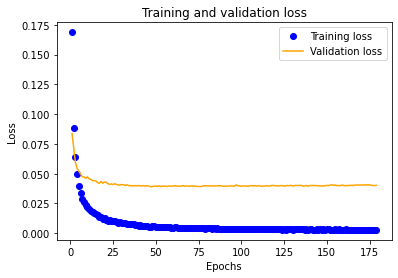

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

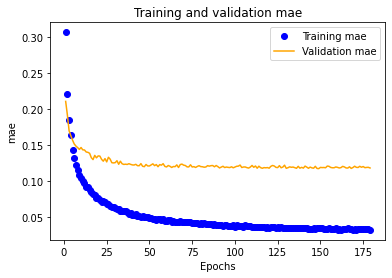

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['mae'] # you can change this
val_loss_values = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

##### Scatterplots of actual vs. predicted

In [ ]:
train_preds_tfidf = model.predict(X_train_1_tfidf)
train_preds_tfidf = pd.DataFrame(train_preds_tfidf, columns = ['pos', 'neg', 'neu', 'compound'])
print(train_preds_tfidf.head())

test_preds_tfidf = model.predict(X_test_1_tfidf)
test_preds_tfidf= pd.DataFrame(test_preds_tfidf, columns = ['pos', 'neg', 'neu', 'compound'])
print(test_preds_tfidf.head())

46/46 [==============================] - 0s 2ms/step
        pos       neg       neu  compound
0  0.232571  0.022062  0.741883  0.645753
1 -0.007782  0.002658  1.003045 -0.017054
2  0.025861  0.110609  0.853183 -0.328617
3  0.245905  0.009788  0.748164  0.921358
4 -0.021197  0.126400  0.900410 -0.452779
31/31 [==============================] - 0s 2ms/step
        pos       neg       neu  compound
0  0.140434  0.022917  0.833750  0.363493
1  0.009266  0.003803  0.985249  0.028873
2  0.049996  0.084768  0.865386 -0.104492
3  0.140766  0.029921  0.824544  0.299876
4  0.041176  0.018504  0.938504  0.091978


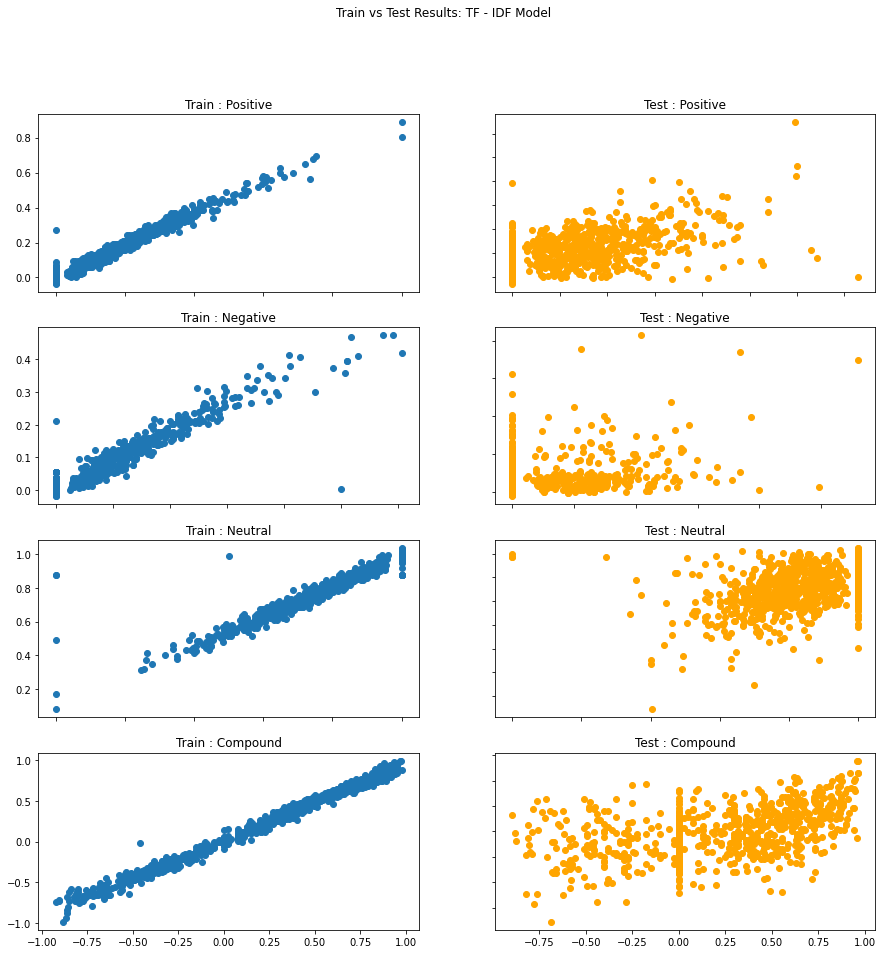

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Train vs Test Results: TF - IDF Model')
axs[0,0].scatter(y_train_1_tfidf['pos'], train_preds_tfidf['pos'])
axs[0,1].scatter(y_test_1_tfidf['pos'], test_preds_tfidf['pos'], c='orange')
axs[1,0].scatter(y_train_1_tfidf['neg'], train_preds_tfidf['neg'])
axs[1,1].scatter(y_test_1_tfidf['neg'], test_preds_tfidf['neg'], c='orange')
axs[2,0].scatter(y_train_1_tfidf['neu'], train_preds_tfidf['neu'])
axs[2,1].scatter(y_test_1_tfidf['neu'], test_preds_tfidf['neu'], c='orange')
axs[3,0].scatter(y_train_1_tfidf['compound'], train_preds_tfidf['compound'])
axs[3,1].scatter(y_test_1_tfidf['compound'], test_preds_tfidf['compound'], c='orange')

# ax2.plot(x, y**2, 'tab:orange')
# ax3.plot(x, -y, 'tab:green')
# ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

axs[0,0].title.set_text('Train : Positive')
axs[0,1].title.set_text('Test : Positive')
axs[1,0].title.set_text('Train : Negative')
axs[1,1].title.set_text('Test : Negative')
axs[2,0].title.set_text('Train : Neutral')
axs[2,1].title.set_text('Test : Neutral')
axs[3,0].title.set_text('Train : Compound')
axs[3,1].title.set_text('Test : Compound')

##### Model Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Error Metrics \n")
print('Mean Absolute Error:')
print('Train:', mean_absolute_error(y_train_1_tfidf, train_preds_tfidf)) # train
print('Test:', mean_absolute_error(y_test_1_tfidf, test_preds_tfidf), '\n') # test

print('Root Mean Squared Error:')
print('Train:', mean_squared_error(y_train_1_tfidf, train_preds_tfidf, squared=False)) # train
print('Test:', mean_squared_error(y_test_1_tfidf, test_preds_tfidf, squared=False), '\n') # test

print('R2 Score:')
print('Train:', r2_score(y_train_1_tfidf, train_preds_tfidf)) # train
print('Test:', r2_score(y_test_1_tfidf, test_preds_tfidf), '\n') # test

Error Metrics 

Mean Absolute Error:
Train: 0.019688631565621704
Test: 0.11691286543600035 

Root Mean Squared Error:
Train: 0.035160002658613125
Test: 0.16580334681632186 

R2 Score:
Train: 0.9510598929124895
Test: 0.2107252106548464 



# Model 2: Flattened word embeddings into a Dense Neural Network (pre-trained)

### Pre-Trained Embeddings Model

###### Tokenize the data

In [ ]:
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences

maxlen = 300  # We will cut reviews after 100 words
training_samples = 150  # We will be training on X samples
validation_samples = 51  # We will be validating on X samples
max_words = 500  # We will only consider the top 10,000 words in the dataset

# we will use training_samples and validation_samples
# later on in a few cells... for splitting data...

In [ ]:
# link: https://keras.io/preprocessing/text/
# has good details on what a tokenizer does
from keras.utils import pad_sequences

# This class allows to vectorize a text corpus, by turning each text into either a sequence of integers
# omits common characters 
tokenizer = Tokenizer(num_words=max_words)

# fit_on_texts means it learns the indices of the words
tokenizer.fit_on_texts(df_Tweets['tweet'])

# the sequences are comprised of those indices
sequences = tokenizer.texts_to_sequences(df_Tweets['tweet'])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# in case of low word counts, we need to pad sequences
# so that they are uniform length
data = pad_sequences(sequences, maxlen=maxlen)

# our labels, which were previously stored as a list [],
# are now converted to a numpy array for modeling
print('Shape of data tensor:', data.shape)

Found 9498 unique tokens.
Shape of data tensor: (2402, 300)


In [ ]:
data

array([[  0,   0,   0, ...,   4,   3,   2],
       [  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ..., 102,   9,  32],
       ...,
       [  0,   0,   0, ...,   4,   3,   2],
       [  0,   0,   0, ..., 299,   1, 412],
       [  0,   0,   0, ..., 361,   9,  28]], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data, y, test_size=0.2)

###### Pre-process the embeddings


In [ ]:
!pip install --upgrade --no-cache-dir gdown --quiet

In [ ]:
!gdown 1r0svWKUVm97fdLxThUM8moAB_h4tGsaO

Downloading...
From: https://drive.google.com/uc?id=1r0svWKUVm97fdLxThUM8moAB_h4tGsaO
To: /content/glove.twitter.27B.100d.txt
100% 1.02G/1.02G [00:11<00:00, 89.2MB/s]


In [ ]:
import numpy as np
# glove_dir = '/content/drive/MyDrive/'
glove_dir = '/content/'
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.twitter.27B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.



Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words, 
embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index 
(built during tokenization). Note that the index `0` is not supposed to stand for any word or token -- it's a placeholder.

In [ ]:
embedding_dim = 100 # this is the dimension of the file we imported
# could use 50, but need to make sure you download that file!

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

#### Building the model

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='linear'))
model.summary()

# in this model, the embeddings are turned on their sides 
# when they get flattened, so our 100 words with
# 100 dimensions turns into 10000 features for modeling

# if you adjust the values for embedding_dim (make it 20?) 
# and max_words (make it 30?),
# this may help you better understand things...

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 100)          50000     
                                                                 
 flatten_3 (Flatten)         (None, 30000)             0         
                                                                 
 dense_33 (Dense)            (None, 32)                960032    
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_34 (Dense)            (None, 4)                 132       
                                                                 
Total params: 1,010,164
Trainable params: 1,010,164
Non-trainable params: 0
_________________________________________________________________


Load the GloVe embeddings in the model


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

es = EarlyStopping(monitor='val_mae', mode='min', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)

history = model.fit(X_train_2, y_train_2,
                    epochs=500,
                    batch_size=30,
                    callbacks = [es],
                    validation_data=(X_test_2, y_test_2))
# saves on left hand side!
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/500
65/65 [==============================] - 2s 21ms/step - loss: 0.0947 - mae: 0.2178 - val_loss: 0.1010 - val_mae: 0.2263
Epoch 2/500
65/65 [==============================] - 1s 17ms/step - loss: 0.0748 - mae: 0.1941 - val_loss: 0.0839 - val_mae: 0.2039
Epoch 3/500
65/65 [==============================] - 1s 17ms/step - loss: 0.0657 - mae: 0.1786 - val_loss: 0.0684 - val_mae: 0.1739
Epoch 4/500
65/65 [==============================] - 1s 18ms/step - loss: 0.0575 - mae: 0.1670 - val_loss: 0.0738 - val_mae: 0.1857
Epoch 5/500
65/65 [==============================] - 1s 17ms/step - loss: 0.0523 - mae: 0.1574 - val_loss: 0.0764 - val_mae: 0.1940
Epoch 6/500
65/65 [==============================] - 1s 16ms/step - loss: 0.0472 - mae: 0.1503 - val_loss: 0.0711 - val_mae: 0.1859
Epoch 7/500
65/65 [==============================] - 1s 16ms/step - loss: 0.0436 - mae: 0.1437 - val_loss: 0.0636 - val_mae: 0.1654
Epoch 8/500
65/65 [==============================] - 1s 17ms/step - loss: 0.

#### Model Evaluation

##### Learning Curve (loss vs. epochs)

In [ ]:
import matplotlib.pyplot as plt

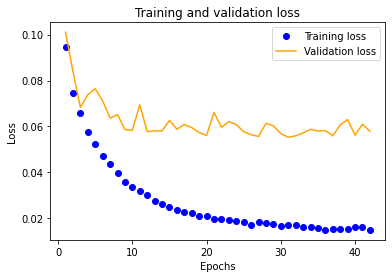

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

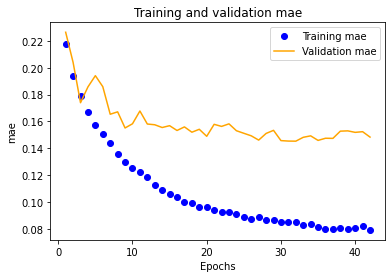

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['mae'] # you can change this
val_loss_values = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

##### Scatterplots of actual vs. predicted

In [ ]:
train_preds_emb = model.predict(X_train_2)
train_preds_emb = pd.DataFrame(train_preds_emb, columns = ['pos', 'neg', 'neu', 'compound'])
print(train_preds_emb.head())

test_preds_emb = model.predict(X_test_2)
test_preds_emb = pd.DataFrame(test_preds_emb, columns = ['pos', 'neg', 'neu', 'compound'])
print(test_preds_emb.head())

61/61 [==============================] - 0s 5ms/step
        pos       neg       neu  compound
0  0.016599  0.040418  0.936709 -0.140206
1  0.153836  0.008212  0.829792  0.365590
2  0.168148  0.019149  0.800891  0.526254
3  0.129700  0.026458  0.831054  0.375330
4  0.218195  0.038578  0.729654  0.452588
16/16 [==============================] - 0s 5ms/step
        pos       neg       neu  compound
0  0.058898  0.072654  0.862167 -0.066786
1  0.028269  0.011762  0.917303  0.035409
2  0.063717  0.040753  0.888277  0.030564
3  0.131622  0.030537  0.823348  0.365849
4  0.040260  0.051387  0.900208  0.019535


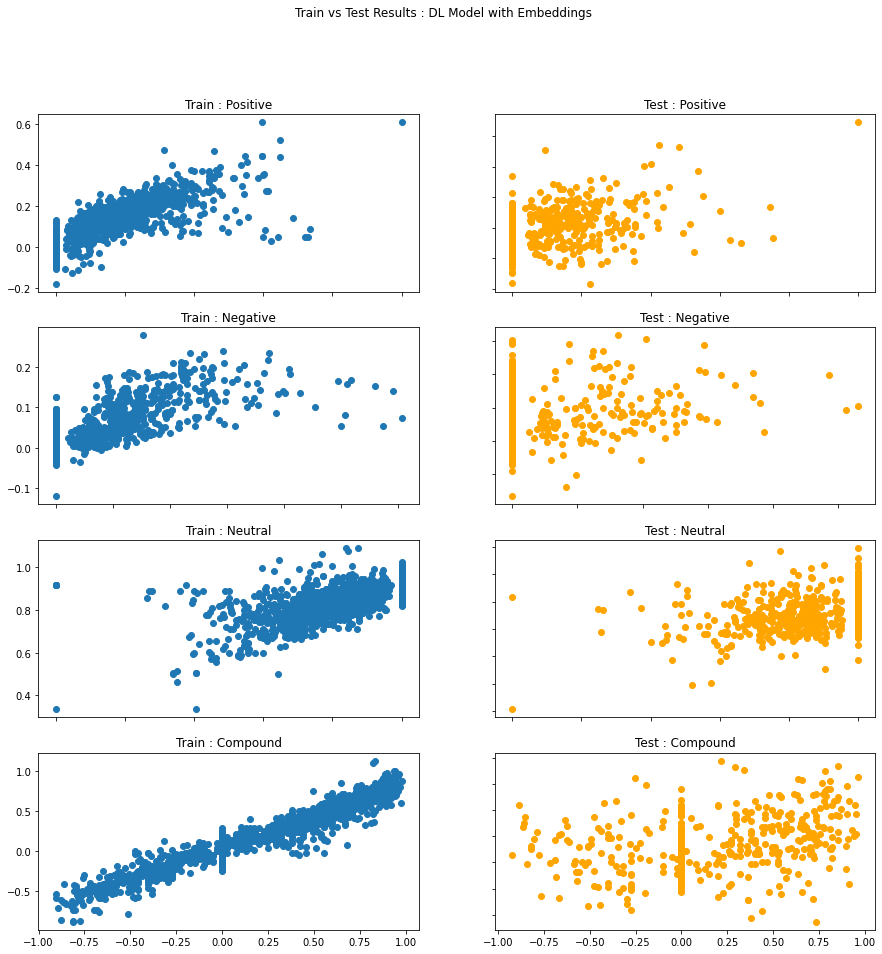

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Train vs Test Results : DL Model with Embeddings')
axs[0,0].scatter(y_train_2['pos'], train_preds_emb['pos'])
axs[0,1].scatter(y_test_2['pos'], test_preds_emb['pos'], c='orange')
axs[1,0].scatter(y_train_2['neg'], train_preds_emb['neg'])
axs[1,1].scatter(y_test_2['neg'], test_preds_emb['neg'], c='orange')
axs[2,0].scatter(y_train_2['neu'], train_preds_emb['neu'])
axs[2,1].scatter(y_test_2['neu'], test_preds_emb['neu'], c='orange')
axs[3,0].scatter(y_train_2['compound'], train_preds_emb['compound'])
axs[3,1].scatter(y_test_2['compound'], test_preds_emb['compound'], c='orange')


for ax in fig.get_axes():
    ax.label_outer()

axs[0,0].title.set_text('Train : Positive')
axs[0,1].title.set_text('Test : Positive')
axs[1,0].title.set_text('Train : Negative')
axs[1,1].title.set_text('Test : Negative')
axs[2,0].title.set_text('Train : Neutral')
axs[2,1].title.set_text('Test : Neutral')
axs[3,0].title.set_text('Train : Compound')
axs[3,1].title.set_text('Test : Compound')

##### Model Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Error Metrics \n")
print('Mean Absolute Error:')
print('Train:', mean_absolute_error(y_train_2, train_preds_emb)) # train
print('Test:', mean_absolute_error(y_test_2, test_preds_emb), '\n') # test

print('Root Mean Squared Error:')
print('Train:',mean_squared_error(y_train_2, train_preds_emb, squared=False)) # train
print('Test:', mean_squared_error(y_test_2, test_preds_emb, squared=False), '\n') # test

print('R2 Score:')
print('Train:',r2_score(y_train_2, train_preds_emb)) # train
print('Test:', r2_score(y_test_2, test_preds_emb), '\n') # test

Error Metrics 

Mean Absolute Error:
Train: 0.06673099757869738
Test: 0.14534384540765705 

Root Mean Squared Error:
Train: 0.09545468593315884
Test: 0.19842773468833774 

R2 Score:
Train: 0.6194425964450908
Test: 0.07114117047135857 



# Model 3: DL model with at least one recurrent layer 

### DL Model with Recurrent Layers

#### Building the model

In [ ]:
from sklearn.model_selection import train_test_split

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data, y, test_size=0.2)

In [ ]:
from keras.layers import Conv1D, MaxPooling1D, Bidirectional, GRU, LSTM
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

# define model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=maxlen))
model.add(Conv1D(filters=64, kernel_size=3))
model.add(MaxPooling1D(2))
model.add(Bidirectional(LSTM(30,
                            return_sequences=True, # remember, if stacking layers, you need to return sequences!
                            activation='relu',
                            recurrent_dropout=0.2)))
model.add(GRU(20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(y.shape[1], activation='linear'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 300, 100)          50000     
                                                                 
 conv1d (Conv1D)             (None, 298, 64)           19264     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 149, 64)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 149, 60)          22800     
 l)                                                              
                                                                 
 gru (GRU)                   (None, 20)                4920      
                                                                 
 dropout_19 (Dropout)        (None, 20)              

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

es = EarlyStopping(monitor='val_mae', mode='min', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)

history = model.fit(X_train_3, y_train_3,
                    epochs=500,
                    batch_size=30,
                    callbacks = [es],
                    validation_data=(X_test_3, y_test_3))
# saves on left hand side!
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/500
65/65 [==============================] - 33s 398ms/step - loss: 0.0895 - mae: 0.2154 - val_loss: 0.0549 - val_mae: 0.1582
Epoch 2/500
65/65 [==============================] - 30s 453ms/step - loss: 0.0622 - mae: 0.1761 - val_loss: 0.0529 - val_mae: 0.1535
Epoch 3/500
65/65 [==============================] - 31s 471ms/step - loss: 0.0541 - mae: 0.1608 - val_loss: 0.0461 - val_mae: 0.1450
Epoch 4/500
65/65 [==============================] - 26s 408ms/step - loss: 0.0497 - mae: 0.1527 - val_loss: 0.0462 - val_mae: 0.1431
Epoch 5/500
65/65 [==============================] - 26s 400ms/step - loss: 0.0467 - mae: 0.1482 - val_loss: 0.0414 - val_mae: 0.1274
Epoch 6/500
65/65 [==============================] - 28s 433ms/step - loss: 0.0417 - mae: 0.1378 - val_loss: 0.0413 - val_mae: 0.1333
Epoch 7/500
65/65 [==============================] - 28s 432ms/step - loss: 0.0403 - mae: 0.1361 - val_loss: 0.0447 - val_mae: 0.1337
Epoch 8/500
65/65 [==============================] - 27s 422ms

#### Model Evaluation

##### Learning Curve (loss vs. epochs)

In [ ]:
import matplotlib.pyplot as plt

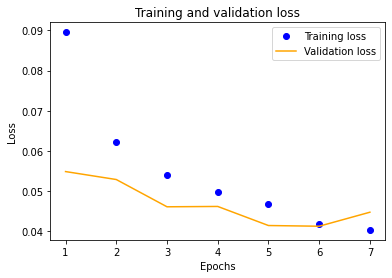

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

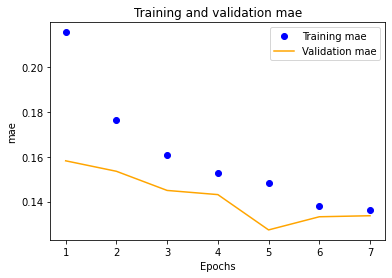

In [ ]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['mae'] # you can change this
val_loss_values = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training mae')
plt.plot(epochs, val_loss_values, 'orange', label='Validation mae')
plt.title('Training and validation mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

##### Scatterplots of actual vs. predicted

In [ ]:
train_preds_rnn = model.predict(X_train_3)
train_preds_rnn = pd.DataFrame(train_preds_rnn, columns = ['pos', 'neg', 'neu', 'compound'])
print(train_preds_rnn.head())

test_preds_rnn = model.predict(X_test_3)
test_preds_rnn = pd.DataFrame(test_preds_rnn, columns = ['pos', 'neg', 'neu', 'compound'])
print(test_preds_rnn.head())

61/61 [==============================] - 5s 63ms/step
        pos       neg       neu  compound
0  0.181305 -0.025139  0.761162  0.667919
1  0.076834  0.086223  0.814714  0.296739
2  0.030972  0.011673  0.802043 -0.014156
3  0.066067  0.023761  0.896687  0.087313
4  0.036875 -0.004251  1.022881 -0.010661
16/16 [==============================] - 1s 61ms/step
        pos       neg       neu  compound
0  0.117203  0.020150  0.903703  0.197612
1  0.076681  0.012278  0.867416  0.084864
2  0.095314 -0.069205  0.932905  0.289983
3  0.113093  0.045863  0.813565  0.150632
4  0.133392  0.031170  0.743412  0.488086


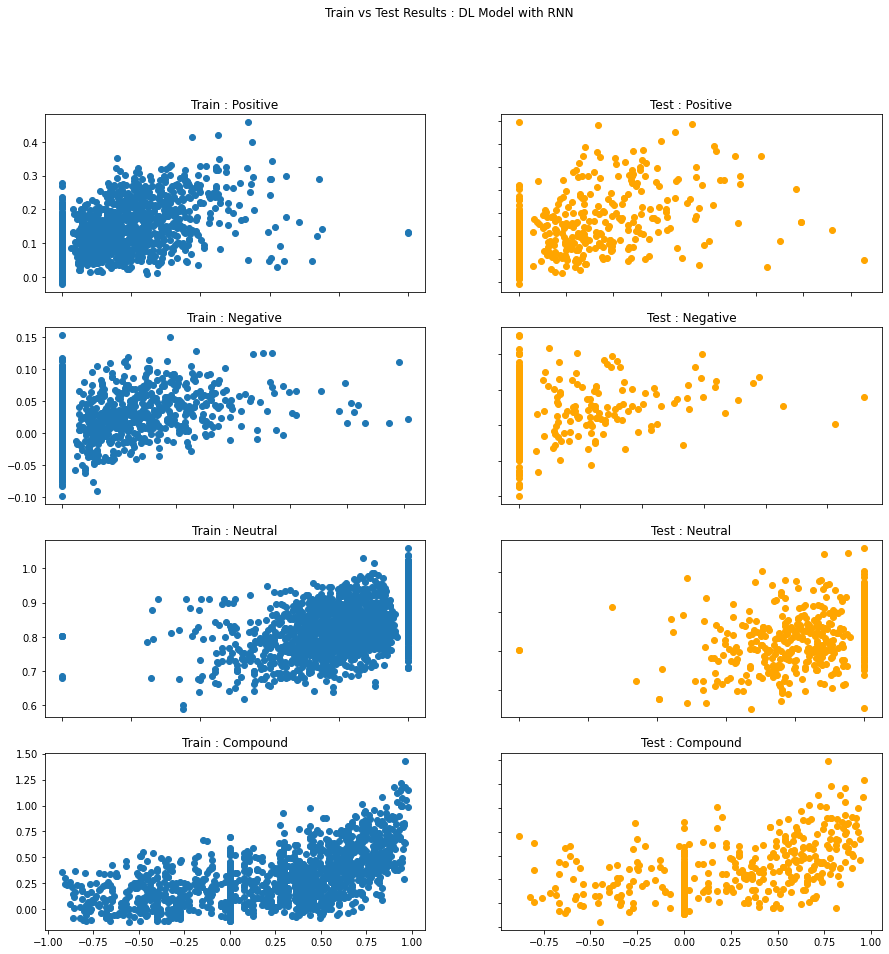

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Train vs Test Results : DL Model with RNN')
axs[0,0].scatter(y_train_3['pos'], train_preds_rnn['pos'])
axs[0,1].scatter(y_test_3['pos'], test_preds_rnn['pos'], c='orange')
axs[1,0].scatter(y_train_3['neg'], train_preds_rnn['neg'])
axs[1,1].scatter(y_test_3['neg'], test_preds_rnn['neg'], c='orange')
axs[2,0].scatter(y_train_3['neu'], train_preds_rnn['neu'])
axs[2,1].scatter(y_test_3['neu'], test_preds_rnn['neu'], c='orange')
axs[3,0].scatter(y_train_3['compound'], train_preds_rnn['compound'])
axs[3,1].scatter(y_test_3['compound'], test_preds_rnn['compound'], c='orange')


for ax in fig.get_axes():
    ax.label_outer()

axs[0,0].title.set_text('Train : Positive')
axs[0,1].title.set_text('Test : Positive')
axs[1,0].title.set_text('Train : Negative')
axs[1,1].title.set_text('Test : Negative')
axs[2,0].title.set_text('Train : Neutral')
axs[2,1].title.set_text('Test : Neutral')
axs[3,0].title.set_text('Train : Compound')
axs[3,1].title.set_text('Test : Compound')

##### Model Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print("Error Metrics \n")
print('Mean Absolute Error:')
print('Train:', mean_absolute_error(y_train_3, train_preds_rnn)) # train
print('Test:', mean_absolute_error(y_test_3, test_preds_rnn), '\n') # test

print('Root Mean Squared Error:')
print('Train:',mean_squared_error(y_train_3, train_preds_rnn, squared=False)) # train
print('Test:', mean_squared_error(y_test_3, test_preds_rnn, squared=False), '\n') # test

print('R2 Score:')
print('Train:',r2_score(y_train_3, train_preds_rnn)) # train
print('Test:', r2_score(y_test_3, test_preds_rnn), '\n') # test

Error Metrics 

Mean Absolute Error:
Train: 0.12237296330074904
Test: 0.12739694583196803 

Root Mean Squared Error:
Train: 0.1681533959257465
Test: 0.17458580146801933 

R2 Score:
Train: 0.22758375156775013
Test: 0.13378010908833224 



### **FINAL INSIGHTS**:

1. By analyzing the **Compound scores** from the 'Sentiment Intensity Analyzer' we can see that the **2.4k tweets** scraped are **distributed roughly normally** across the 3 categories (Positive, Neutral and Negative)

2. We used these **four columns (Compound, Pos, Neg and Neutral) from the Sentiment Intensity Analyzer as target variables** for modeling using different combination of neural networks layers

3. **MODEL 1:**
    
  * **Count vectorizer** was used to convert the word counts into a vector of numbers for implementation in the neural network across the different nodes - The model evaluation metrics show strong overfitting for the training dataset. 

  * We observed an MAE of 0.02 and RSE of 0.96 for training as opposed to MAE of 0.11 and RSE of 0.19 for test dataset

  * **IDF** is defined as the calculation of how relevant a word in a series or corpus is to a text. We append this on top of our existing vector to see if the results for the evaluation metrics improve.

  * We did not observe any significant improvement in terms of overfitting - we observed MAE of 0.02 and RSE of 0.95 for training as opposed to MAE of 0.12 and RSE of 0.21 for test dataset

4. **MODEL 2:**

  * This model **includes a pre-trained embeddings model - We tried the different model types (dimensions = 25 and 100)** - We finally selected 100 dimensions as initial baseline results

  * We added layers - 'Flatten', 'Dense' and 'Dropout' to improve the evaluation metrics 

  * This **model performed poorly compared to the last few models** in terms of evaluation metrics - We observed an MAE of 0.07 and RSE of 0.62 for training as opposed to MAE of 0.14 and RSE of 0.07 for test dataset

  * Overfitting was present in this model as well

5. **MODEL 3:**

  * The **last model is a combination of all the different NNs** we learnt during the course. We still used the weights from the embeddings model file and readjusted the vector matrix

  * For building the model, we used the embeddings, Conv1D, MaxPooling, Dropout, Bi-directional LSTM, GRU layers

  * We **tempered the paramters across the layers to finally avoid overfitting** of data to the training dataset

  * We observed MAE of 0.12 and RSE of 0.23 for training as opposed to MAE of 0.13 and RSE of 0.13 for test dataset

5. Hence, we leveraged the logic of the Sentiment Intensity Analyzer and used a combination of different neural layers for creating 3-4 different model architectures. We did not see a high model accuracy for a test dataset however, **we did eliminate the overfitting for MODEL 3**.

